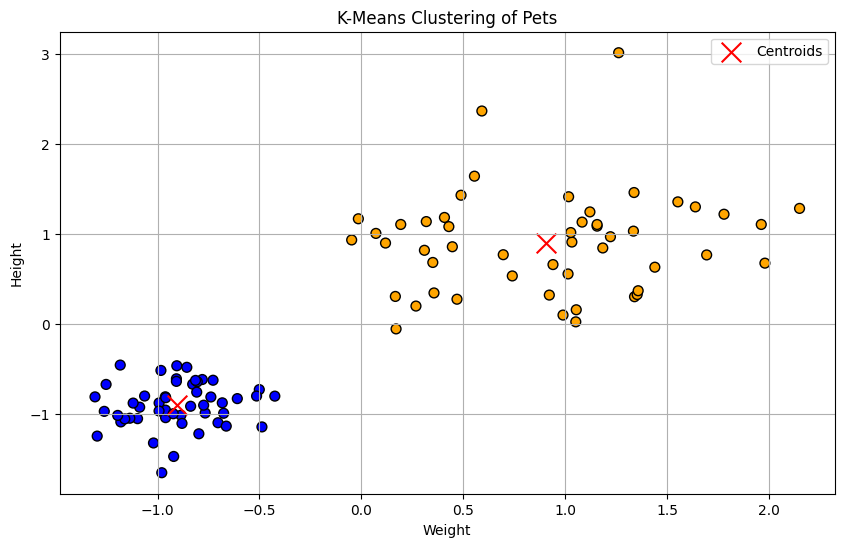

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# dataset for pets (e.g., Cats and Dogs)
np.random.seed(42)

#  data for Cats
cat_data = {
    'Weight': np.random.normal(10, 2, 50),
    'Height': np.random.normal(30, 5, 50),
    'Age': np.random.randint(1, 15, 50)
}

#  data for Dogs
dog_data = {
    'Weight': np.random.normal(25, 5, 50),
    'Height': np.random.normal(60, 10, 50),
    'Age': np.random.randint(1, 15, 50)
}


pet_data = pd.concat([pd.DataFrame(cat_data), pd.DataFrame(dog_data)], ignore_index=True)
pet_data['Type'] = ['Cat'] * 50 + ['Dog'] * 50

#  features
X = pet_data[['Weight', 'Height', 'Age']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  k-Means Clustering
def kmeans(X, k, max_iterations=100):
    kmeans = KMeans(n_clusters=k, max_iter=max_iterations, random_state=42)
    labels = kmeans.fit_predict(X)
    return kmeans.cluster_centers_, labels


k = 2


centroids, labels = kmeans(X_scaled, k)

# Visualization
def visualize_pets(X, labels, centroids):
    plt.figure(figsize=(10, 6))
    colors = ['blue' if label == 0 else 'orange' for label in labels]

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title('K-Means Clustering of Pets')
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualize the clustering results
visualize_pets(X_scaled, labels, centroids)
